In [30]:
import pandas as pd
from collections import OrderedDict

examDict = {
    '学习时间': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
    '分数': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]
}

examOrderDict = OrderedDict(examDict)
examDf = pd.DataFrame(examOrderDict)

print('- 原始数据 exam =')
examDf.head()

- 原始数据 exam =


,学习时间,分数
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


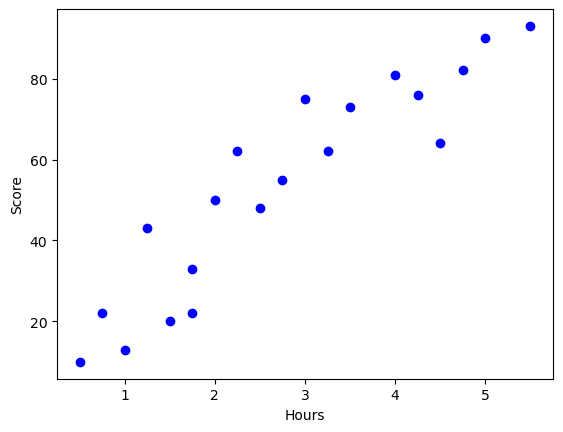

In [31]:
import matplotlib.pyplot as plt
exam_x = examDf.loc[:, '学习时间']
exam_y = examDf.loc[:, '分数']

plt.scatter(exam_x, exam_y, color='b', label='exam data')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    exam_x, exam_y, train_size=0.8, random_state=0)
print('- 原始数据特征 x_exam =', exam_x.shape)
print('  训练数据特征 x_train =', x_train.shape)
print('  测试数据特征 x_test =', x_test.shape)
print('- 原始数据标签 y_exam =', exam_y.shape)
print('  训练数据标签 y_train =', y_train.shape)
print('  测试数据标签 y_test =', y_test.shape)

- 原始数据特征 x_exam = (20,)
  训练数据特征 x_train = (16,)
  测试数据特征 x_test = (4,)
- 原始数据标签 y_exam = (20,)
  训练数据标签 y_train = (16,)
  测试数据标签 y_test = (4,)


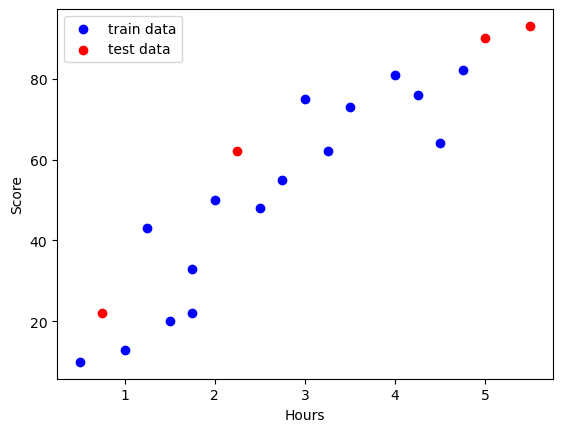

In [33]:
plt.scatter(x_train, y_train, color='b', label='train data')
plt.scatter(x_test, y_test, color='red', label='test data')
plt.legend(loc=2)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
x_train_n = x_train.values.reshape(-1, 1)
y_train_n = y_train.values.reshape(-1, 1)

model = LinearRegression()
model.fit(x_train_n, y_train_n)
a = model.intercept_
b = model.coef_
print('- 最佳拟合线的截距 intercept =', a)
print('  最佳拟合线的系数 coef =', b)

- 最佳拟合线的截距 intercept = [5.47540003]
  最佳拟合线的系数 coef = [[17.02706744]]


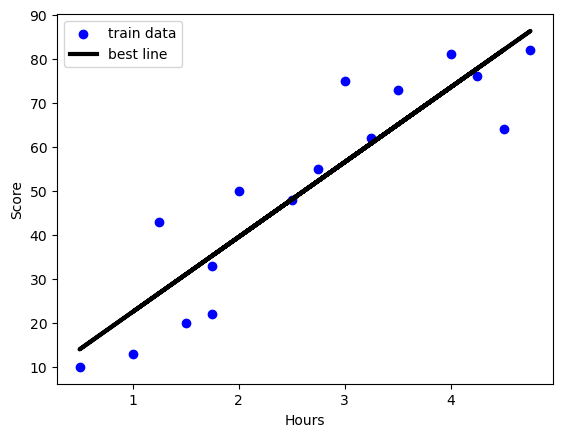

In [35]:
y_train_pred = model.predict(x_train_n)
plt.scatter(x_train_n, y_train_n,
            color='b', label='train data')
plt.plot(x_train_n, y_train_pred,
         color='black', linewidth='3', label='best line')
plt.legend(loc=2)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [36]:
rDf = examDf.corr()
print('- 相关系数矩阵 corr =')
rDf

- 相关系数矩阵 corr =


,学习时间,分数
学习时间,1.000000,0.923985
分数,0.923985,1.000000


In [37]:
x_test_n = x_test.values.reshape(-1, 1)
y_test_n = y_test.values.reshape(-1, 1)

print('- 决定系数 R^2 =')
model.score(x_test_n, y_test_n)

- 决定系数 R^2 =


0.8821066866276913